In [1]:
pip freeze

absl-py==1.4.0
accelerate==1.8.1
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.4.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.1
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==25.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.2
arviz==0.21.0
astropy==7.1.0
astropy-iers-data==0.2025.7.7.0.39.39
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.8.0
bigquery-magics==0.10.1
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.5.1
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.1
build==1.2.2.post1
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.7.9
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.2
chex==0.1.89
clarabel==0.11.1
click==8.2.1
cloudpathlib==0.21.1
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.image as mpimg
import os

In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/train/_classes.csv')
train_df.head()

,filename,anold-chiari-malformation,arachnoid-cyst,cerebellah-hypoplasia,colphocephaly,encephalocele,holoprosencephaly,hydracenphaly,intracranial-hemorrdge,intracranial-tumor,m-magna,mild-ventriculomegaly,moderate-ventriculomegaly,normal,polencephaly,severe-ventriculomegaly,vein-of-galen
0,Copy-of-arachnoid-cyst-37b_aug_0_png_jpg.rf.3e...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Patient00709_Plane3_1_of_3_aug_1_png_jpg.rf.3d...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Copy-of-mild-ventriculomegaly-24a_aug_4_png_jp...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Copy-of-mild-ventriculomegaly-23c_aug_3_png_jp...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Patient00709_Plane3_2_of_3_aug_4_png_jpg.rf.3e...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [4]:
train_df.shape

(1418, 17)

In [5]:
train_df.columns

Index(['filename', ' anold-chiari-malformation', ' arachnoid-cyst',
       ' cerebellah-hypoplasia', ' colphocephaly', ' encephalocele',
       ' holoprosencephaly', ' hydracenphaly', ' intracranial-hemorrdge',
       ' intracranial-tumor', ' m-magna', ' mild-ventriculomegaly',
       ' moderate-ventriculomegaly', ' normal', ' polencephaly',
       ' severe-ventriculomegaly', ' vein-of-galen'],
      dtype='object')

In [6]:
print("Types of abnormilities and their count in the train dataset")
categories_count = []
for column in train_df.columns:
  if column != 'filename':
    count = (train_df[column] == 1).sum()
    categories_count.append(count)
    print(f"{column.strip()}: {count}")

Types of abnormilities and their count in the train dataset
anold-chiari-malformation: 44
arachnoid-cyst: 112
cerebellah-hypoplasia: 103
colphocephaly: 72
encephalocele: 113
holoprosencephaly: 7
hydracenphaly: 17
intracranial-hemorrdge: 43
intracranial-tumor: 14
m-magna: 32
mild-ventriculomegaly: 195
moderate-ventriculomegaly: 258
normal: 227
polencephaly: 83
severe-ventriculomegaly: 94
vein-of-galen: 4


In [7]:
print("No of classes: ", len(categories_count))

No of classes:  16


In [8]:
train_df.isnull().sum()

,0
filename,0
anold-chiari-malformation,0
arachnoid-cyst,0
cerebellah-hypoplasia,0
colphocephaly,0
encephalocele,0
holoprosencephaly,0
hydracenphaly,0
intracranial-hemorrdge,0
intracranial-tumor,0


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   filename                    1418 non-null   object
 1    anold-chiari-malformation  1418 non-null   int64 
 2    arachnoid-cyst             1418 non-null   int64 
 3    cerebellah-hypoplasia      1418 non-null   int64 
 4    colphocephaly              1418 non-null   int64 
 5    encephalocele              1418 non-null   int64 
 6    holoprosencephaly          1418 non-null   int64 
 7    hydracenphaly              1418 non-null   int64 
 8    intracranial-hemorrdge     1418 non-null   int64 
 9    intracranial-tumor         1418 non-null   int64 
 10   m-magna                    1418 non-null   int64 
 11   mild-ventriculomegaly      1418 non-null   int64 
 12   moderate-ventriculomegaly  1418 non-null   int64 
 13   normal                     1418 non-null   int6

In [10]:
train_df.size

24106

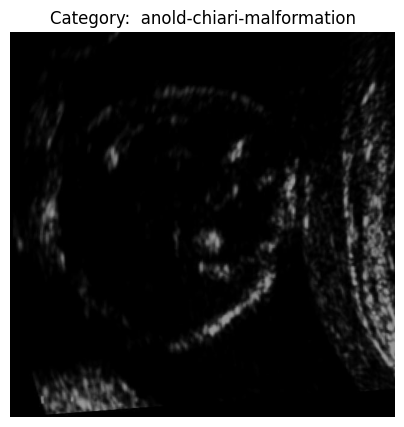

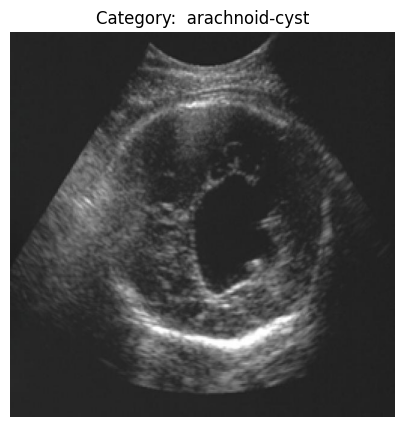

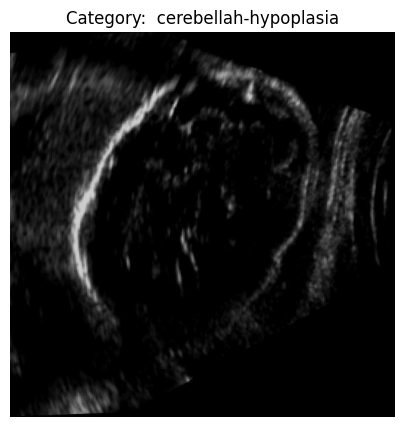

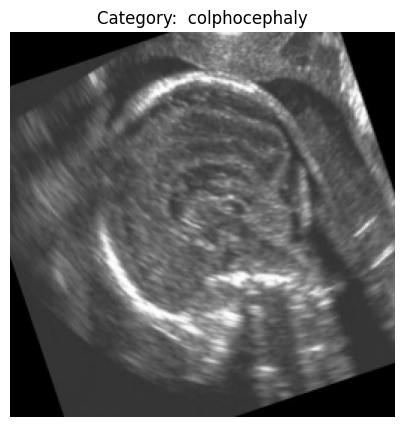

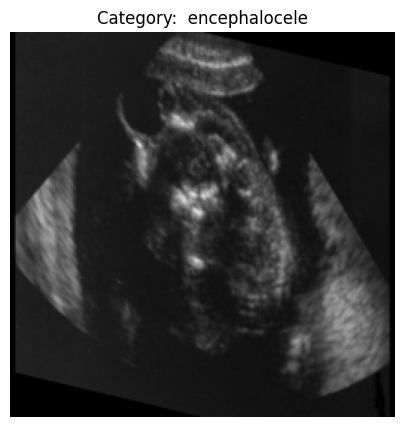

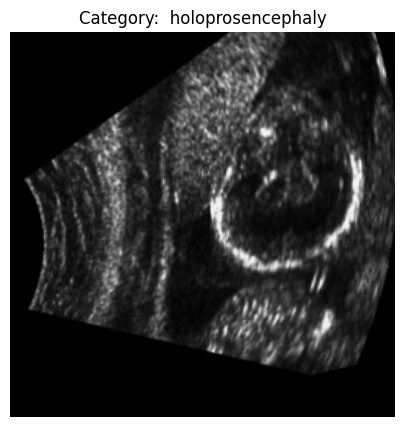

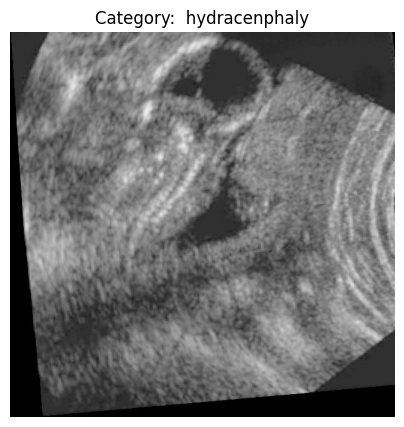

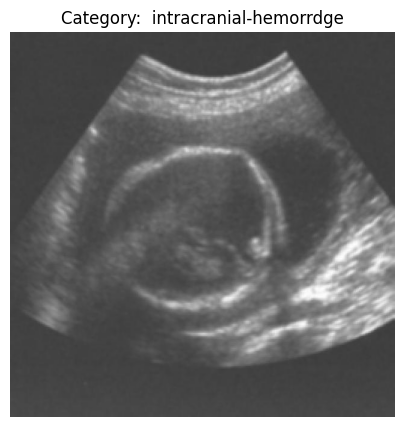

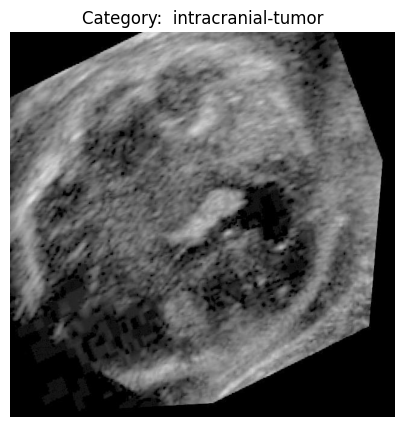

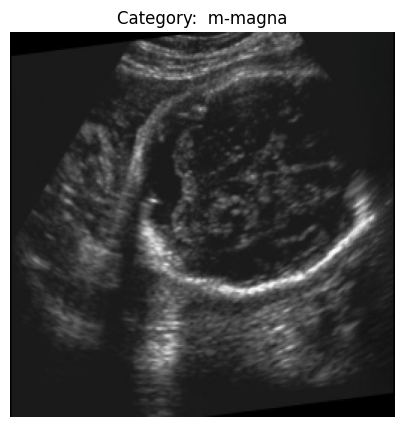

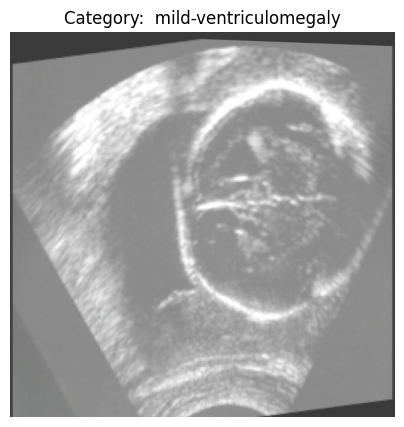

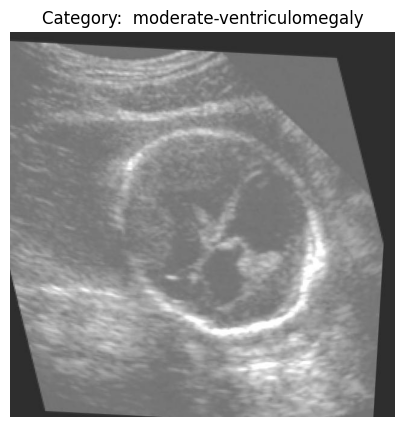

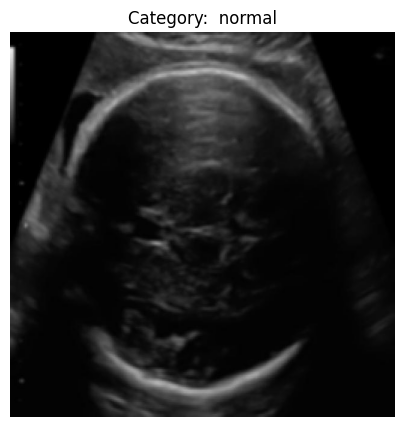

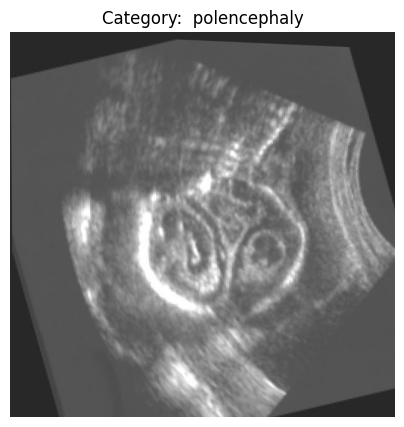

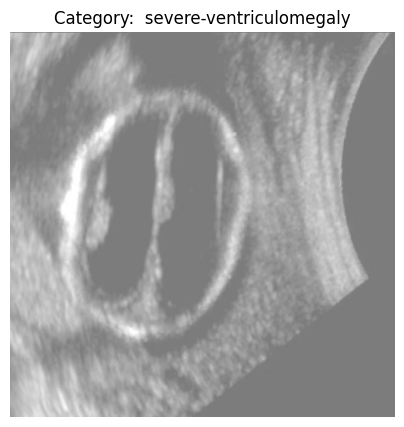

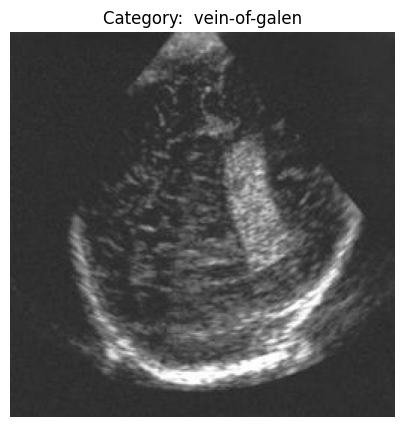

In [11]:
def display_images_for_categories(df, base_path, categories):
  """
  Displays the first image for each specified category.

  Args:
    df: The DataFrame containing image filenames and categories.
    base_path: The base path to the image directory.
    categories: A list of category names.
  """
  for category in categories:
    row = df[df[category] == 1].iloc[0]
    filename = row['filename']
    image_path = f'{base_path}/{filename}'

    img = mpimg.imread(image_path)
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(f'Category: {category}')
    plt.axis('off')
    plt.show()

categories_to_display = [column for column in train_df.columns if column != 'filename']

train_image_base_path = '/content/drive/MyDrive/train'

display_images_for_categories(train_df, train_image_base_path, categories_to_display)


## Test Data / Validation Data

In [12]:
test_dir = '/content/drive/MyDrive/test'
test_df = pd.read_csv('/content/drive/MyDrive/test/_classes.csv')
test_df.head()

,filename,anold-chiari-malformation,arachnoid-cyst,cerebellah-hypoplasia,colphocephaly,encephalocele,holoprosencephaly,hydracenphaly,intracranial-hemorrdge,intracranial-tumor,m-magna,mild-ventriculomegaly,moderate-ventriculomegaly,normal,polencephaly,severe-ventriculomegaly,vein-of-galen
0,Copy-of-mild-ventriculomegaly-18c_aug_2_png_jp...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Copy-of-intracranial-hemorrdge-34a_aug_4_png_j...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,Copy-of-moderate-ventriculomegaly-34_aug_4_png...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Copy-of-polencephaly30k_aug_2_png_jpg.rf.05b0e...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Copy-of-encephalocele-4-32c_aug_4_png_jpg.rf.0...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [13]:
print("Types of abnormilities and their count in the test dataset")
categories_count = []
for column in test_df.columns:
  if column != 'filename':
    count = (test_df[column] == 1).sum()
    categories_count.append(count)
    print(f"{column.strip()}: {count}")

Types of abnormilities and their count in the test dataset
anold-chiari-malformation: 3
arachnoid-cyst: 13
cerebellah-hypoplasia: 16
colphocephaly: 11
encephalocele: 15
holoprosencephaly: 4
hydracenphaly: 2
intracranial-hemorrdge: 8
intracranial-tumor: 0
m-magna: 4
mild-ventriculomegaly: 24
moderate-ventriculomegaly: 26
normal: 24
polencephaly: 7
severe-ventriculomegaly: 19
vein-of-galen: 0


In [14]:
test_df.shape

(176, 17)

In [15]:
test_df.isna().sum()

,0
filename,0
anold-chiari-malformation,0
arachnoid-cyst,0
cerebellah-hypoplasia,0
colphocephaly,0
encephalocele,0
holoprosencephaly,0
hydracenphaly,0
intracranial-hemorrdge,0
intracranial-tumor,0


--- Loading DataFrames from separate CSV files ---
Detected 16 classes: [' anold-chiari-malformation', ' arachnoid-cyst', ' cerebellah-hypoplasia', ' colphocephaly', ' encephalocele', ' holoprosencephaly', ' hydracenphaly', ' intracranial-hemorrdge', ' intracranial-tumor', ' m-magna', ' mild-ventriculomegaly', ' moderate-ventriculomegaly', ' normal', ' polencephaly', ' severe-ventriculomegaly', ' vein-of-galen']

--- Loading image paths and labels for each split ---
  Found 1418 images, 0 missing from /content/drive/MyDrive/train.
  Found 174 images, 0 missing from /content/drive/MyDrive/valid.
  Found 176 images, 0 missing from /content/drive/MyDrive/test.

--- Loading image data into NumPy arrays for each split ---
  Loading 1418 images into arrays...
    Loaded 100 image arrays...
    Loaded 200 image arrays...
    Loaded 300 image arrays...
    Loaded 400 image arrays...
    Loaded 500 image arrays...
    Loaded 600 image arrays...
    Loaded 700 image arrays...
    Loaded 800 imag

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         8,208 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,922,064 (11.15 MB)

 Trainable params: 664,080 (2.53 MB)

 Non-trainable params: 2,257,984 (8.61 MB)


--- Training Phase 1: Training only the new classification head ---


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 40s 636ms/step - accuracy: 0.2270 - loss: 2.8274 - val_accuracy: 0.5057 - val_loss: 1.6621 - learning_rate: 0.0010
Epoch 2/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 19s 435ms/step - accuracy: 0.4140 - loss: 1.8801 - val_accuracy: 0.4770 - val_loss: 1.5844 - learning_rate: 0.0010
Epoch 3/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 402ms/step - accuracy: 0.4792 - loss: 1.6118 - val_accuracy: 0.6552 - val_loss: 1.2329 - learning_rate: 0.0010
Epoch 4/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 19s 412ms/step - accuracy: 0.5133 - loss: 1.5135 - val_accuracy: 0.5747 - val_loss: 1.2419 - learning_rate: 0.0010
Epoch 5/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 400ms/step - accuracy: 0.5639 - loss: 1.3819 - val_accuracy: 0.7184 - val_loss: 1.0105 - learning_rate: 0.0010
Epoch 6/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 401ms/step - accuracy: 0.5725 - loss: 1.2810 - val_accuracy: 0.6322 - val_loss: 1.0681 - learning_rate: 0.0010
Epoch 7/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 401ms/step - accuracy: 0.5977 - loss: 1.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         8,208 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,922,064 (11.15 MB)

 Trainable params: 2,288,976 (8.73 MB)

 Non-trainable params: 633,088 (2.42 MB)


--- Evaluating the Final Model on Test Set ---
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 632ms/step - accuracy: 0.8125 - loss: 0.5197
Test loss: 0.5211606621742249
Test accuracy: 0.8181818127632141


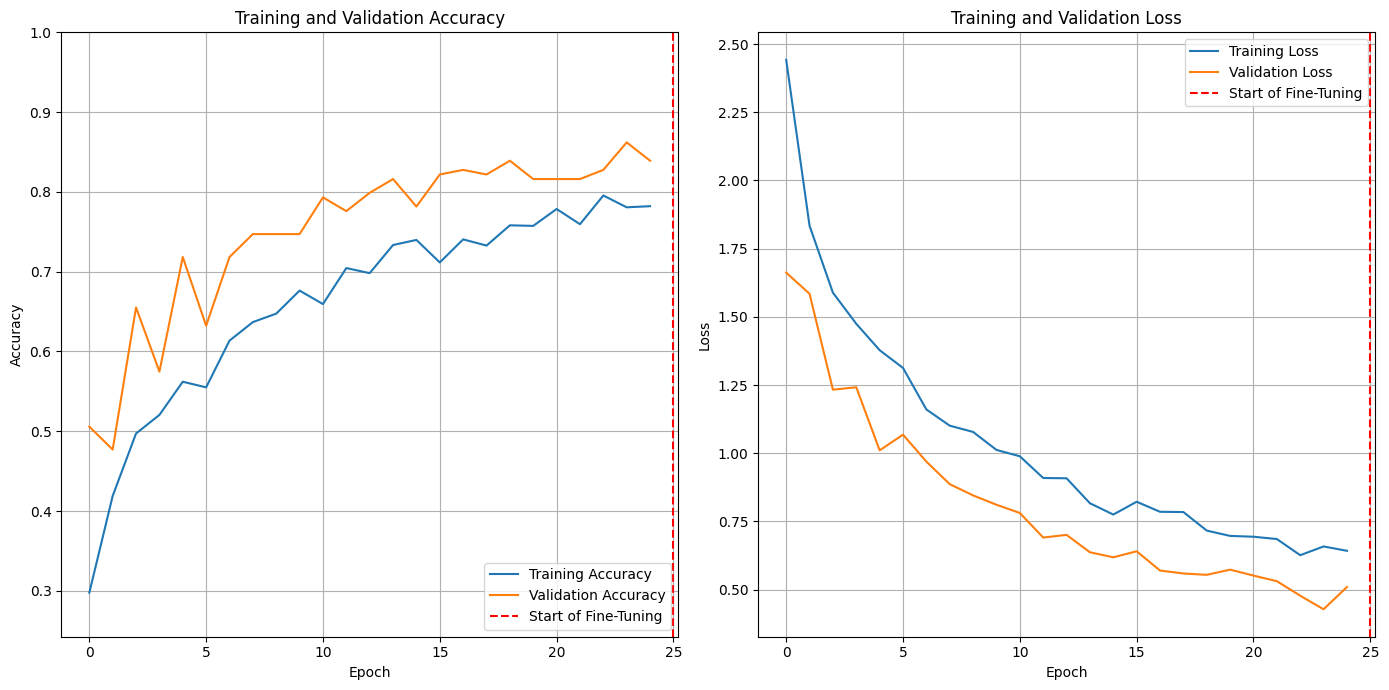

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau ### NEW ###
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2

# --- Configuration (Adjust these paths and parameters as needed) ---
IMG_HEIGHT = 224
IMG_WIDTH = 224
CSV_FILENAME = '_classes.csv' # The name of the CSV file within each directory

# IMPORTANT: Adjust these directory paths to where your images and their respective CSVs are located
train_dir = '/content/drive/MyDrive/train'
val_dir = '/content/drive/MyDrive/valid'
test_dir = '/content/drive/MyDrive/test'


# --- Helper Functions ---

# Function to load image paths and integer labels for a given directory and DataFrame
def load_paths_and_labels(data_df, image_directory, class_names_list):
    image_paths = []
    image_labels = []
    found_count = 0
    missing_count = 0
    for index, row in data_df.iterrows():
        filename = row['filename']
        full_image_path = os.path.join(image_directory, filename)
        if os.path.exists(full_image_path):
            image_paths.append(full_image_path)
            # Find the index where the value is 1 (integer label)
            # Assuming there is always exactly one '1' per row in the class columns.
            label_index = np.where(row[class_names_list].values == 1)[0][0]
            image_labels.append(label_index)
            found_count += 1
        else:
            missing_count += 1
    print(f"  Found {found_count} images, {missing_count} missing from {image_directory}.")
    return np.array(image_paths), np.array(image_labels, dtype=np.int64)

# Function to load and preprocess images into NumPy array
def load_images_to_array(img_paths, target_height, target_width):
    images_data = []
    print(f"  Loading {len(img_paths)} images into arrays...")
    for i, path in enumerate(img_paths):
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"    Warning: Could not load image data from {path}. Skipping.")
            continue
        image = cv2.resize(image, (target_width, target_height))
        image = image.astype(np.float32)
        image = np.expand_dims(image, axis=-1)
        images_data.append(image)
        if (i + 1) % 100 == 0:
            print(f"    Loaded {i + 1} image arrays...")
    print(f"  Finished loading {len(images_data)} image arrays.")
    return np.array(images_data)


# --- 1. Load Data ---
print("--- Loading DataFrames from separate CSV files ---")
try:
    train_df = pd.read_csv(os.path.join(train_dir, CSV_FILENAME))
    val_df = pd.read_csv(os.path.join(val_dir, CSV_FILENAME))
    test_df = pd.read_csv(os.path.join(test_dir, CSV_FILENAME))
except FileNotFoundError as e:
    print(f"Error: A CSV file was not found. Please check your directory paths and '{CSV_FILENAME}'. Error: {e}")
    exit()

class_names = train_df.columns[1:].tolist()
num_classes = len(class_names)
print(f"Detected {num_classes} classes: {class_names}")

print(f"\n--- Loading image paths and labels for each split ---")
train_image_paths, y_train = load_paths_and_labels(train_df, train_dir, class_names)
val_image_paths, y_val = load_paths_and_labels(val_df, val_dir, class_names)
test_image_paths, y_test = load_paths_and_labels(test_df, test_dir, class_names)

print(f"\n--- Loading image data into NumPy arrays for each split ---")
X_train = load_images_to_array(train_image_paths, IMG_HEIGHT, IMG_WIDTH)
X_val = load_images_to_array(val_image_paths, IMG_HEIGHT, IMG_WIDTH)
X_test = load_images_to_array(test_image_paths, IMG_HEIGHT, IMG_WIDTH)

print("\n--- Converting 1-channel images to 3-channels for Transfer Learning ---")
X_train_3channel = np.repeat(X_train, 3, axis=-1)
X_val_3channel = np.repeat(X_val, 3, axis=-1)
X_test_3channel = np.repeat(X_test, 3, axis=-1)

# --- 3. Setup ImageDataGenerators ---
print("\n--- Setting up ImageDataGenerators ---")
train_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=20, width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, vertical_flip=True, brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(X_train_3channel, y_train, batch_size=32, shuffle=True)
validation_generator = val_test_datagen.flow(X_val_3channel, y_val, batch_size=32, shuffle=False)
test_generator = val_test_datagen.flow(X_test_3channel, y_test, batch_size=32, shuffle=False)

# --- Build the Transfer Learning Model (MobileNetV2) ---
print("\n--- Building Transfer Learning Model (MobileNetV2 Base) ---")
base_model = MobileNetV2(
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), include_top=False, weights='imagenet'
)
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


### NEW: Define callbacks for smarter training ###
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)


# --- Train the Model (Phase 1: Train only the new head) ---
print("\n--- Training Phase 1: Training only the new classification head ---")
history_phase1 = model.fit(
    train_generator,
    epochs=25,  # ### UPDATED: Increased epochs, EarlyStopping will handle the rest
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]  # ### NEW ###
)

### UPDATED: Strategic Fine-tuning Section ###
print("\n--- Training Phase 2: Strategically fine-tuning the top layers ---")

base_model.trainable = True

# Find the layer index to start fine-tuning from. 'block_13' is a good choice for MobileNetV2.
fine_tune_at_layer = 'block_13_expand_relu'
fine_tune_start_index = None

for i, layer in enumerate(base_model.layers):
    if layer.name == fine_tune_at_layer:
        fine_tune_start_index = i
        break

if fine_tune_start_index is None:
     print(f"Warning: Layer '{fine_tune_at_layer}' not found. Fine-tuning the whole model as fallback.")
else:
    # Freeze all the layers before the `fine_tune_at_layer`
    for layer in base_model.layers[:fine_tune_start_index]:
        layer.trainable = False
    print(f"Fine-tuning from layer '{fine_tune_at_layer}' (index {fine_tune_start_index}) onwards.")


# Recompile the model with a very low learning rate, crucial for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary() # Note the change in "Trainable params"

# Continue training, now fine-tuning the specified layers
history_phase2 = model.fit(
    train_generator,
    epochs=25, # ### UPDATED: Increased epochs for fine-tuning phase
    validation_data=validation_generator,
    initial_epoch=history_phase1.epoch[-1] + 1 if history_phase1.epoch else 0,
    callbacks=[early_stopping, reduce_lr] # ### NEW ###
)


# --- Evaluate the Model ---
print("\n--- Evaluating the Final Model on Test Set ---")
# The model has been restored to its best weights by EarlyStopping(restore_best_weights=True)
loss, accuracy = model.evaluate(test_generator)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")


# --- Plot training history ---
# Use .get() to safely access keys, preventing errors if training was interrupted
acc = history_phase1.history.get('accuracy', []) + history_phase2.history.get('accuracy', [])
val_acc = history_phase1.history.get('val_accuracy', []) + history_phase2.history.get('val_accuracy', [])
loss_hist = history_phase1.history.get('loss', []) + history_phase2.history.get('loss', [])
val_loss = history_phase1.history.get('val_loss', []) + history_phase2.history.get('val_loss', [])

# ### UPDATED: Robust plotting check ###
if not acc and not val_acc:
    print("\nNo training history found to plot. Did the model training complete?")
else:
    epochs_range = range(len(acc))
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.axvline(len(history_phase1.history.get('accuracy', [])), color='r', linestyle='--', label='Start of Fine-Tuning')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()) * 0.9, 1])
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss_hist, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.axvline(len(history_phase1.history.get('loss', [])), color='r', linestyle='--', label='Start of Fine-Tuning')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

--- Loading DataFrames from separate CSV files ---
Detected 16 classes: [' anold-chiari-malformation', ' arachnoid-cyst', ' cerebellah-hypoplasia', ' colphocephaly', ' encephalocele', ' holoprosencephaly', ' hydracenphaly', ' intracranial-hemorrdge', ' intracranial-tumor', ' m-magna', ' mild-ventriculomegaly', ' moderate-ventriculomegaly', ' normal', ' polencephaly', ' severe-ventriculomegaly', ' vein-of-galen']

--- Loading image paths and labels for each split ---
  Found 1418 images, 0 missing from /content/drive/MyDrive/train.
  Found 174 images, 0 missing from /content/drive/MyDrive/valid.
  Found 176 images, 0 missing from /content/drive/MyDrive/test.

--- Loading image data into NumPy arrays for each split ---
  Loading 1418 images into arrays...
    Loaded 100 image arrays...
    Loaded 200 image arrays...
    Loaded 300 image arrays...
    Loaded 400 image arrays...
    Loaded 500 image arrays...
    Loaded 600 image arrays...
    Loaded 700 image arrays...
    Loaded 800 imag

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │         8,208 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,583,392 (25.11 MB)

 Trainable params: 664,080 (2.53 MB)

 Non-trainable params: 5,919,312 (22.58 MB)


--- Training Phase 1: Training only the new classification head ---


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 66s 913ms/step - accuracy: 0.2453 - loss: 2.4238 - val_accuracy: 0.4540 - val_loss: 1.6665 - learning_rate: 5.0000e-04
Epoch 2/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 19s 429ms/step - accuracy: 0.4141 - loss: 1.8142 - val_accuracy: 0.5230 - val_loss: 1.3737 - learning_rate: 5.0000e-04
Epoch 3/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 398ms/step - accuracy: 0.5335 - loss: 1.4480 - val_accuracy: 0.6667 - val_loss: 1.1673 - learning_rate: 5.0000e-04
Epoch 4/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 401ms/step - accuracy: 0.6019 - loss: 1.2611 - val_accuracy: 0.6897 - val_loss: 1.0393 - learning_rate: 5.0000e-04
Epoch 5/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 19s 429ms/step - accuracy: 0.6030 - loss: 1.1607 - val_accuracy: 0.6667 - val_loss: 0.9527 - learning_rate: 5.0000e-04
Epoch 6/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 398ms/step - accuracy: 0.6348 - loss: 1.1111 - val_accuracy: 0.6839 - val_loss: 0.8653 - learning_rate: 5.0000e-04
Epoch 7/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 19s 419ms/step - acc

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │         8,208 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,583,392 (25.11 MB)

 Trainable params: 5,150,780 (19.65 MB)

 Non-trainable params: 1,432,612 (5.46 MB)


--- Evaluating the Final Model on Test Set ---
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 861ms/step - accuracy: 0.8984 - loss: 0.2797
Test loss: 0.27024316787719727
Test accuracy: 0.9147727489471436


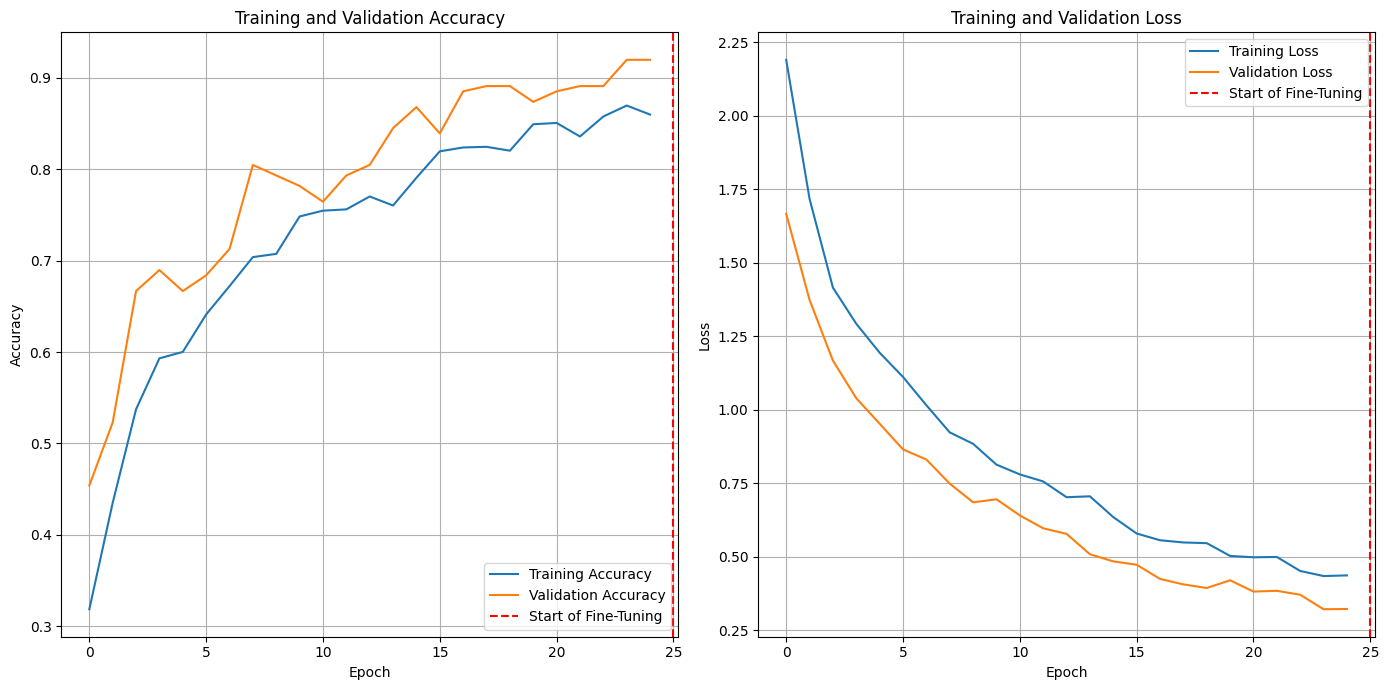

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# ### EFFICIENTNET UPDATE ###: Import EfficientNetV2B0 and its specific preprocessing function
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input ### CRITICAL FIX ###
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2

# --- Configuration (Adjust these paths and parameters as needed) ---
IMG_HEIGHT = 224
IMG_WIDTH = 224
CSV_FILENAME = '_classes.csv' # The name of the CSV file within each directory

# IMPORTANT: Adjust these directory paths to where your images and their respective CSVs are located
train_dir = '/content/drive/MyDrive/train'
val_dir = '/content/drive/MyDrive/valid'
test_dir = '/content/drive/MyDrive/test'


# --- Helper Functions --- (No changes needed here)

def load_paths_and_labels(data_df, image_directory, class_names_list):
    image_paths = []
    image_labels = []
    found_count = 0
    missing_count = 0
    for index, row in data_df.iterrows():
        filename = row['filename']
        full_image_path = os.path.join(image_directory, filename)
        if os.path.exists(full_image_path):
            image_paths.append(full_image_path)
            label_index = np.where(row[class_names_list].values == 1)[0][0]
            image_labels.append(label_index)
            found_count += 1
        else:
            missing_count += 1
    print(f"  Found {found_count} images, {missing_count} missing from {image_directory}.")
    return np.array(image_paths), np.array(image_labels, dtype=np.int64)

def load_images_to_array(img_paths, target_height, target_width):
    images_data = []
    print(f"  Loading {len(img_paths)} images into arrays...")
    for i, path in enumerate(img_paths):
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"    Warning: Could not load image data from {path}. Skipping.")
            continue
        image = cv2.resize(image, (target_width, target_height))
        image = image.astype(np.float32)
        image = np.expand_dims(image, axis=-1)
        images_data.append(image)
        if (i + 1) % 100 == 0:
            print(f"    Loaded {i + 1} image arrays...")
    print(f"  Finished loading {len(images_data)} image arrays.")
    return np.array(images_data)


# --- 1. Load Data --- (No changes needed here)
print("--- Loading DataFrames from separate CSV files ---")
try:
    train_df = pd.read_csv(os.path.join(train_dir, CSV_FILENAME))
    val_df = pd.read_csv(os.path.join(val_dir, CSV_FILENAME))
    test_df = pd.read_csv(os.path.join(test_dir, CSV_FILENAME))
except FileNotFoundError as e:
    print(f"Error: A CSV file was not found. Please check your directory paths and '{CSV_FILENAME}'. Error: {e}")
    exit()

class_names = train_df.columns[1:].tolist()
num_classes = len(class_names)
print(f"Detected {num_classes} classes: {class_names}")

print(f"\n--- Loading image paths and labels for each split ---")
train_image_paths, y_train = load_paths_and_labels(train_df, train_dir, class_names)
val_image_paths, y_val = load_paths_and_labels(val_df, val_dir, class_names)
test_image_paths, y_test = load_paths_and_labels(test_df, test_dir, class_names)

print(f"\n--- Loading image data into NumPy arrays for each split ---")
X_train = load_images_to_array(train_image_paths, IMG_HEIGHT, IMG_WIDTH)
X_val = load_images_to_array(val_image_paths, IMG_HEIGHT, IMG_WIDTH)
X_test = load_images_to_array(test_image_paths, IMG_HEIGHT, IMG_WIDTH)

print("\n--- Converting 1-channel images to 3-channels for Transfer Learning ---")
X_train_3channel = np.repeat(X_train, 3, axis=-1)
X_val_3channel = np.repeat(X_val, 3, axis=-1)
X_test_3channel = np.repeat(X_test, 3, axis=-1)

# --- ### CRITICAL FIX ###: Use the correct preprocessing for EfficientNetV2 ---
print("\n--- Setting up ImageDataGenerators with EfficientNetV2 preprocessing ---")
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input, # Use the model's dedicated function
    rotation_range=20, width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, vertical_flip=True, brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)
# Make sure the validation/test generator ALSO uses the correct preprocessing
val_test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = train_datagen.flow(X_train_3channel, y_train, batch_size=32, shuffle=True)
validation_generator = val_test_datagen.flow(X_val_3channel, y_val, batch_size=32, shuffle=False)
test_generator = val_test_datagen.flow(X_test_3channel, y_test, batch_size=32, shuffle=False)


# --- Build the model with EfficientNetV2B0 ---
print("\n--- Building Transfer Learning Model (EfficientNetV2B0 Base) ---")
base_model = EfficientNetV2B0(
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# ### RECOMMENDED TWEAK ###: Use a slightly lower learning rate for the initial phase
# Adam's default (1e-3) can sometimes be too aggressive for complex models.
optimizer_phase1 = tf.keras.optimizers.Adam(learning_rate=5e-4)
model.compile(optimizer=optimizer_phase1, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Define callbacks with slightly more patience
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# --- Train the Model (Phase 1: Train only the new head) ---
print("\n--- Training Phase 1: Training only the new classification head ---")
history_phase1 = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

# --- Strategic Fine-tuning for EfficientNetV2 ---
print("\n--- Training Phase 2: Strategically fine-tuning the top layers ---")
base_model.trainable = True
fine_tune_at_layer = 'block6a_expand_conv'
fine_tune_start_index = None

for i, layer in enumerate(base_model.layers):
    if layer.name == fine_tune_at_layer:
        fine_tune_start_index = i
        break

if fine_tune_start_index is None:
     print(f"Warning: Layer '{fine_tune_at_layer}' not found. Fine-tuning the whole model as fallback.")
else:
    for layer in base_model.layers[:fine_tune_start_index]:
        layer.trainable = False
    print(f"Fine-tuning from layer '{fine_tune_at_layer}' (index {fine_tune_start_index}) onwards.")

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

history_phase2 = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    initial_epoch=history_phase1.epoch[-1] + 1 if history_phase1.epoch else 0,
    callbacks=[early_stopping, reduce_lr]
)

# --- Evaluate the Model ---
print("\n--- Evaluating the Final Model on Test Set ---")
loss, accuracy = model.evaluate(test_generator)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

# --- Plot training history --- (No changes needed here)
acc = history_phase1.history.get('accuracy', []) + history_phase2.history.get('accuracy', [])
val_acc = history_phase1.history.get('val_accuracy', []) + history_phase2.history.get('val_accuracy', [])
loss_hist = history_phase1.history.get('loss', []) + history_phase2.history.get('loss', [])
val_loss = history_phase1.history.get('val_loss', []) + history_phase2.history.get('val_loss', [])

if not acc and not val_acc:
    print("\nNo training history found to plot. Did the model training complete?")
else:
    epochs_range = range(len(acc))
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    if history_phase1.history: plt.axvline(len(history_phase1.history['accuracy']), color='r', linestyle='--', label='Start of Fine-Tuning')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss_hist, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    if history_phase1.history: plt.axvline(len(history_phase1.history['loss']), color='r', linestyle='--', label='Start of Fine-Tuning')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [18]:
# See how many images belong to each class
class_counts = train_df[class_names].sum()
print(class_counts)

anold-chiari-malformation     44
arachnoid-cyst               112
cerebellah-hypoplasia        103
colphocephaly                 72
encephalocele                113
holoprosencephaly              7
hydracenphaly                 17
intracranial-hemorrdge        43
intracranial-tumor            14
m-magna                       32
mild-ventriculomegaly        195
moderate-ventriculomegaly    258
normal                       227
polencephaly                  83
severe-ventriculomegaly       94
vein-of-galen                  4
dtype: int64


--- Loading DataFrames from separate CSV files ---
Detected 16 classes: [' anold-chiari-malformation', ' arachnoid-cyst', ' cerebellah-hypoplasia', ' colphocephaly', ' encephalocele', ' holoprosencephaly', ' hydracenphaly', ' intracranial-hemorrdge', ' intracranial-tumor', ' m-magna', ' mild-ventriculomegaly', ' moderate-ventriculomegaly', ' normal', ' polencephaly', ' severe-ventriculomegaly', ' vein-of-galen']

--- Loading image paths and labels for each split ---
  Found 1418 images, 0 missing from /content/drive/MyDrive/train.
  Found 174 images, 0 missing from /content/drive/MyDrive/valid.
  Found 176 images, 0 missing from /content/drive/MyDrive/test.

--- Loading image data into NumPy arrays for each split ---
  Loading 1418 images into arrays...
    Loaded 100 image arrays...
    Loaded 200 image arrays...
    Loaded 300 image arrays...
    Loaded 400 image arrays...
    Loaded 500 image arrays...
    Loaded 600 image arrays...
    Loaded 700 image arrays...
    Loaded 800 imag

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │         8,208 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,583,392 (25.11 MB)

 Trainable params: 664,080 (2.53 MB)

 Non-trainable params: 5,919,312 (22.58 MB)


--- Training Phase 1: Training only the new classification head ---


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 61s 836ms/step - accuracy: 0.1326 - loss: 2.8316 - val_accuracy: 0.4023 - val_loss: 2.0930 - learning_rate: 5.0000e-04
Epoch 2/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 19s 428ms/step - accuracy: 0.3038 - loss: 2.1935 - val_accuracy: 0.4655 - val_loss: 1.8836 - learning_rate: 5.0000e-04
Epoch 3/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 396ms/step - accuracy: 0.3663 - loss: 1.8960 - val_accuracy: 0.5115 - val_loss: 1.6036 - learning_rate: 5.0000e-04
Epoch 4/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 398ms/step - accuracy: 0.4659 - loss: 1.5591 - val_accuracy: 0.5575 - val_loss: 1.4856 - learning_rate: 5.0000e-04
Epoch 5/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 19s 421ms/step - accuracy: 0.4628 - loss: 1.4249 - val_accuracy: 0.5805 - val_loss: 1.3233 - learning_rate: 5.0000e-04
Epoch 6/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 398ms/step - accuracy: 0.5124 - loss: 1.3123 - val_accuracy: 0.5920 - val_loss: 1.2096 - learning_rate: 5.0000e-04
Epoch 7/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 19s 430ms/step - acc

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │         8,208 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,583,392 (25.11 MB)

 Trainable params: 5,150,780 (19.65 MB)

 Non-trainable params: 1,432,612 (5.46 MB)


--- Evaluating the Final Model on Test Set ---
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 524ms/step - accuracy: 0.8843 - loss: 0.4401
Test loss: 0.42598631978034973
Test accuracy: 0.8977272510528564

--- Generating Detailed Classification Report and Confusion Matrix ---
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step

Classification Report:
                            precision    recall  f1-score   support

 anold-chiari-malformation       0.75      1.00      0.86         3
            arachnoid-cyst       0.93      1.00      0.96        13
     cerebellah-hypoplasia       0.73      1.00      0.84        16
             colphocephaly       1.00      0.82      0.90        11
             encephalocele       0.93      0.87      0.90        15
         holoprosencephaly       1.00      1.00      1.00         4
             hydracenphaly       1.00      1.00      1.00         2
    intracranial-hemorrdge       1.00      1.00      1.00         8
        intracranial-tumor       0.00      0.00      0.00         0

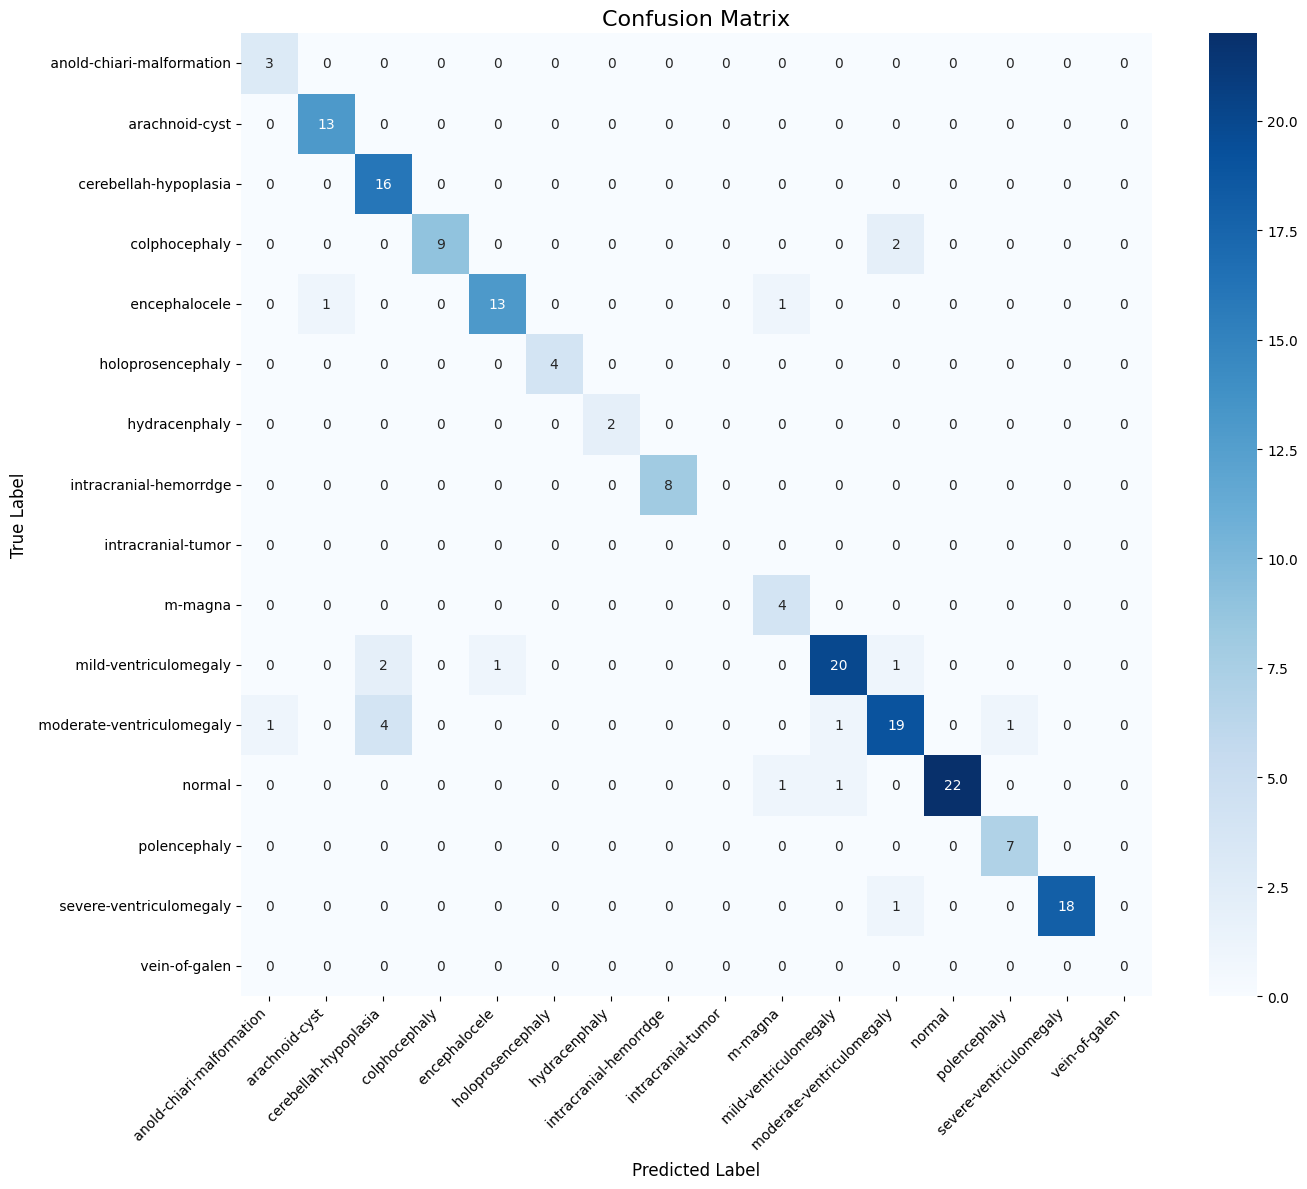

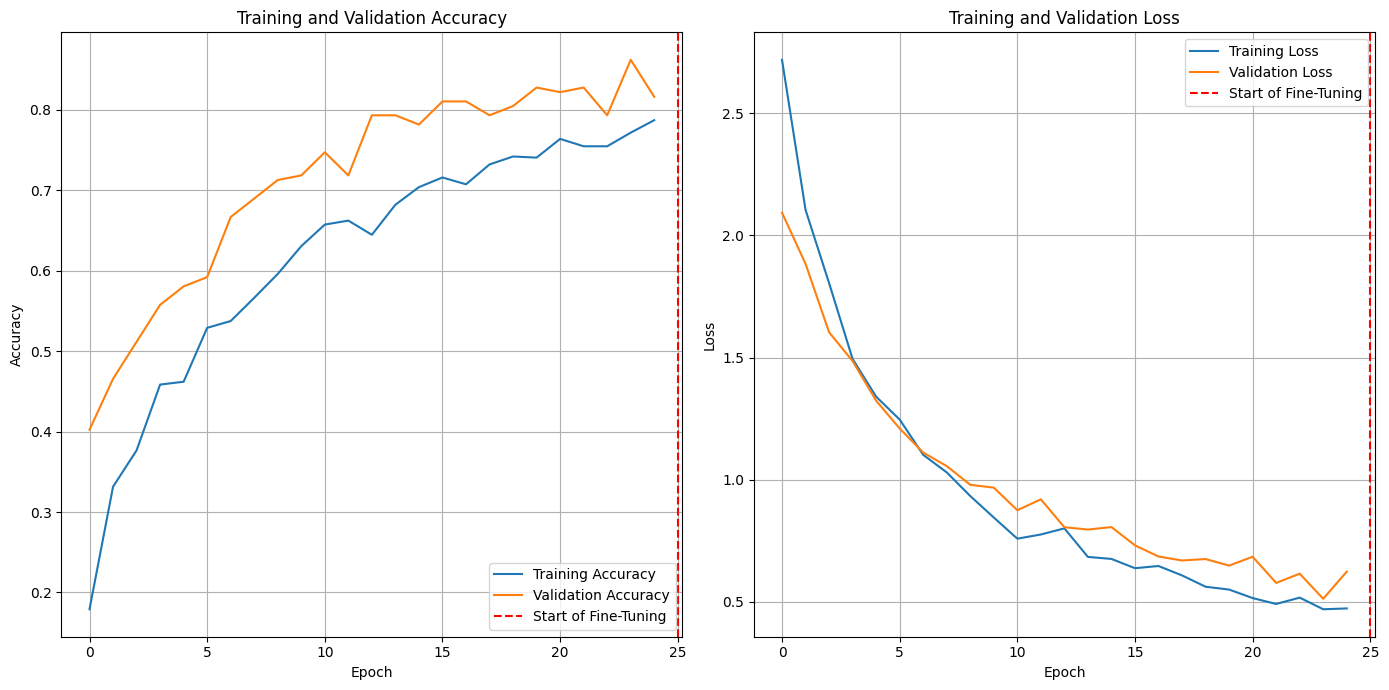

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2

# ### NEW ###: Import libraries for class weights and detailed evaluation
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


# --- Configuration (Adjust these paths and parameters as needed) ---
IMG_HEIGHT = 224
IMG_WIDTH = 224
CSV_FILENAME = '_classes.csv'

# IMPORTANT: Adjust these directory paths to where your images and their respective CSVs are located
train_dir = '/content/drive/MyDrive/train'
val_dir = '/content/drive/MyDrive/valid'
test_dir = '/content/drive/MyDrive/test'


# --- Helper Functions ---
def load_paths_and_labels(data_df, image_directory, class_names_list):
    image_paths = []
    image_labels = []
    found_count = 0
    missing_count = 0
    for index, row in data_df.iterrows():
        filename = row['filename']
        full_image_path = os.path.join(image_directory, filename)
        if os.path.exists(full_image_path):
            image_paths.append(full_image_path)
            label_index = np.where(row[class_names_list].values == 1)[0][0]
            image_labels.append(label_index)
            found_count += 1
        else:
            missing_count += 1
    print(f"  Found {found_count} images, {missing_count} missing from {image_directory}.")
    return np.array(image_paths), np.array(image_labels, dtype=np.int64)

def load_images_to_array(img_paths, target_height, target_width):
    images_data = []
    print(f"  Loading {len(img_paths)} images into arrays...")
    for i, path in enumerate(img_paths):
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"    Warning: Could not load image data from {path}. Skipping.")
            continue
        image = cv2.resize(image, (target_width, target_height))
        image = image.astype(np.float32)
        image = np.expand_dims(image, axis=-1)
        images_data.append(image)
        if (i + 1) % 100 == 0:
            print(f"    Loaded {i + 1} image arrays...")
    print(f"  Finished loading {len(images_data)} image arrays.")
    return np.array(images_data)


# --- 1. Load Data ---
print("--- Loading DataFrames from separate CSV files ---")
try:
    train_df = pd.read_csv(os.path.join(train_dir, CSV_FILENAME))
    val_df = pd.read_csv(os.path.join(val_dir, CSV_FILENAME))
    test_df = pd.read_csv(os.path.join(test_dir, CSV_FILENAME))
except FileNotFoundError as e:
    print(f"Error: A CSV file was not found. Please check your directory paths and '{CSV_FILENAME}'. Error: {e}")
    exit()

class_names = train_df.columns[1:].tolist()
num_classes = len(class_names)
print(f"Detected {num_classes} classes: {class_names}")

print(f"\n--- Loading image paths and labels for each split ---")
train_image_paths, y_train = load_paths_and_labels(train_df, train_dir, class_names)
val_image_paths, y_val = load_paths_and_labels(val_df, val_dir, class_names)
test_image_paths, y_test = load_paths_and_labels(test_df, test_dir, class_names)

print(f"\n--- Loading image data into NumPy arrays for each split ---")
X_train = load_images_to_array(train_image_paths, IMG_HEIGHT, IMG_WIDTH)
X_val = load_images_to_array(val_image_paths, IMG_HEIGHT, IMG_WIDTH)
X_test = load_images_to_array(test_image_paths, IMG_HEIGHT, IMG_WIDTH)

print("\n--- Converting 1-channel images to 3-channels for Transfer Learning ---")
X_train_3channel = np.repeat(X_train, 3, axis=-1)
X_val_3channel = np.repeat(X_val, 3, axis=-1)
X_test_3channel = np.repeat(X_test, 3, axis=-1)

# --- Use the correct preprocessing for EfficientNetV2 ---
print("\n--- Setting up ImageDataGenerators with EfficientNetV2 preprocessing ---")
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
    shear_range=0.2, zoom_range=0.2, horizontal_flip=True,
    vertical_flip=True, brightness_range=[0.8, 1.2], fill_mode='nearest'
)
val_test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow(X_train_3channel, y_train, batch_size=32, shuffle=True)
validation_generator = val_test_datagen.flow(X_val_3channel, y_val, batch_size=32, shuffle=False)
test_generator = val_test_datagen.flow(X_test_3channel, y_test, batch_size=32, shuffle=False)


# --- ### NEW: ADDRESS CLASS IMBALANCE ### ---
print("\n--- Calculating class weights to handle data imbalance ---")
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))
print("Computed class weights. Rare classes will have higher weights.")


# --- Build the model with EfficientNetV2B0 ---
print("\n--- Building Transfer Learning Model (EfficientNetV2B0 Base) ---")
base_model = EfficientNetV2B0(
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

optimizer_phase1 = tf.keras.optimizers.Adam(learning_rate=5e-4)
model.compile(optimizer=optimizer_phase1, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# --- Train the Model (Phase 1) with class weights ---
print("\n--- Training Phase 1: Training only the new classification head ---")
history_phase1 = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weight_dict  # Apply weights here
)

# --- Strategic Fine-tuning (Phase 2) with class weights ---
print("\n--- Training Phase 2: Strategically fine-tuning the top layers ---")
base_model.trainable = True
fine_tune_at_layer = 'block6a_expand_conv'
fine_tune_start_index = None
for i, layer in enumerate(base_model.layers):
    if layer.name == fine_tune_at_layer:
        fine_tune_start_index = i
        break
if fine_tune_start_index is not None:
    for layer in base_model.layers[:fine_tune_start_index]:
        layer.trainable = False
    print(f"Fine-tuning from layer '{fine_tune_at_layer}' (index {fine_tune_start_index}) onwards.")
else:
    print(f"Warning: Layer '{fine_tune_at_layer}' not found. Fine-tuning the whole model as fallback.")

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

history_phase2 = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    initial_epoch=history_phase1.epoch[-1] + 1 if history_phase1.epoch else 0,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weight_dict  # Apply weights here too
)

# --- Evaluate the Model ---
print("\n--- Evaluating the Final Model on Test Set ---")
loss, accuracy = model.evaluate(test_generator)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

# --- ### NEW: DETAILED EVALUATION ### ---
print("\n--- Generating Detailed Classification Report and Confusion Matrix ---")

# Reset the test generator before predicting to ensure batches start from the beginning
test_generator.reset()

# Calculate the correct number of steps for prediction
steps_for_predict = int(np.ceil(len(X_test) / 32))

y_pred_probs = model.predict(test_generator, steps=steps_for_predict)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Ensure y_true has the same length as the predictions.
# This is a safeguard in case the number of test samples is not perfectly
# divisible by the batch size.
y_true = y_test[:len(y_pred_classes)]


# Classification Report
print("\nClassification Report:")
# THE FIX: Add the 'labels' parameter to tell sklearn about ALL possible classes,
# even if one is missing from the test set.
print(classification_report(
    y_true,
    y_pred_classes,
    target_names=class_names,
    labels=np.arange(num_classes), # This line fixes the error
    zero_division=0
))

# Confusion Matrix
print("\nConfusion Matrix:")
# THE FIX: Also add the 'labels' parameter here to ensure the matrix is always
# the correct size (num_classes x num_classes).
cm = confusion_matrix(y_true, y_pred_classes, labels=np.arange(num_classes))
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# --- Plot training history ---
acc = history_phase1.history.get('accuracy', []) + history_phase2.history.get('accuracy', [])
val_acc = history_phase1.history.get('val_accuracy', []) + history_phase2.history.get('val_accuracy', [])
loss_hist = history_phase1.history.get('loss', []) + history_phase2.history.get('loss', [])
val_loss = history_phase1.history.get('val_loss', []) + history_phase2.history.get('val_loss', [])

if not acc and not val_acc:
    print("\nNo training history found to plot. Did the model training complete?")
else:
    epochs_range = range(len(acc))
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    if history_phase1.history: plt.axvline(len(history_phase1.history['accuracy']), color='r', linestyle='--', label='Start of Fine-Tuning')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss_hist, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    if history_phase1.history: plt.axvline(len(history_phase1.history['loss']), color='r', linestyle='--', label='Start of Fine-Tuning')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [20]:
print("\n--- Saving the trained model ---")
model.save("ultrasound_classifier_final.h5")
print("Model successfully saved to 'ultrasound_classifier_final.h5'")


--- Saving the trained model ---
Model successfully saved to 'ultrasound_classifier_final.h5'


In [21]:
print("\n--- Saving class names ---")
with open("class_names.txt", "w") as f:
    for name in class_names:
        f.write(f"{name}\n")
print("Class names successfully saved to 'class_names.txt'")


--- Saving class names ---
Class names successfully saved to 'class_names.txt'


Model loaded successfully.
Loaded 16 class names.


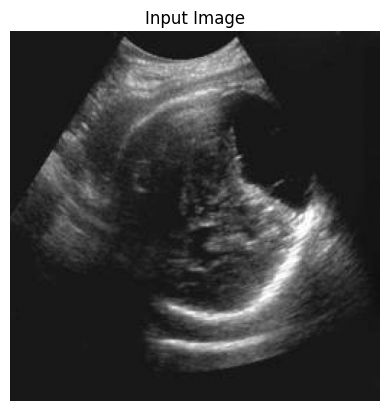

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step

    PREDICTION RESULT
  Predicted Class:  'cerebellah-hypoplasia'
  Confidence:        58.33%


In [22]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# --- 1. Load the required components ---

# Define the paths to your saved model and class names
# Make sure these files are in the same directory as this script
MODEL_PATH = "ultrasound_classifier_final.h5"
CLASS_NAMES_PATH = "class_names.txt"

# Check if files exist before trying to load them
if not os.path.exists(MODEL_PATH):
    print(f"Error: Model file not found at '{MODEL_PATH}'")
    exit()
if not os.path.exists(CLASS_NAMES_PATH):
    print(f"Error: Class names file not found at '{CLASS_NAMES_PATH}'")
    exit()

# Load the trained model
# Using compile=False is a small optimization for when you only need to do inference.
try:
    loaded_model = tf.keras.models.load_model(MODEL_PATH, compile=False)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")
    exit()

# Load the class names from the text file
try:
    with open(CLASS_NAMES_PATH, "r") as f:
        class_names = [line.strip() for line in f.readlines()]
    print(f"Loaded {len(class_names)} class names.")
except Exception as e:
    print(f"Error loading class names: {e}")
    exit()

# --- 2. Define the Prediction Function ---

def predict_single_image(image_path, model, class_names_list):
    """
    Loads, preprocesses, and predicts the class for a single image.
    This function replicates all the steps from the training pipeline.

    Args:
        image_path (str): The full path to the image file.
        model (tf.keras.Model): The loaded Keras model.
        class_names_list (list): A list of class names in the correct order.

    Returns:
        tuple: A tuple containing (predicted_class_name, confidence_score)
               or (None, None) if an error occurs.
    """
    try:
        # Step A: Load the image file as grayscale, just like in training
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Error: Could not load image at {image_path}")
            return None, None

        # Display the original image for verification
        plt.imshow(img, cmap='gray')
        plt.title("Input Image")
        plt.axis('off')
        plt.show()

        # Step B: Preprocess the image to match the model's input requirements
        # 1. Resize to 224x224
        img_resized = cv2.resize(img, (224, 224))
        # 2. Add a channel dimension and repeat it to create a 3-channel image
        img_3_channel = np.repeat(np.expand_dims(img_resized, axis=-1), 3, axis=-1)
        # 3. Add a "batch" dimension (the model expects a batch of images, even if it's just one)
        img_batch = np.expand_dims(img_3_channel, axis=0).astype(np.float32)

        # 4. CRITICAL: Use the *exact* same preprocessing function as during training
        # This scales the pixel values from [0, 255] to the [-1, 1] range that EfficientNetV2 expects.
        from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
        img_preprocessed = preprocess_input(img_batch)

        # Step C: Make the prediction using the loaded model
        prediction_probs = model.predict(img_preprocessed)

        # Step D: Decode the prediction result
        # Find the index of the class with the highest probability
        predicted_index = np.argmax(prediction_probs[0])
        # Get the confidence score (the highest probability)
        confidence = np.max(prediction_probs[0])
        # Look up the class name using the index
        predicted_class_name = class_names_list[predicted_index]

        return predicted_class_name, confidence

    except Exception as e:
        print(f"An error occurred during prediction: {e}")
        return None, None

# --- 3. Use the function to predict on an image ---

# ===================================================================
# IMPORTANT: Change this path to the actual path of an image you want to test
# Example for Google Colab:
IMAGE_TO_PREDICT = '/content/drive/MyDrive/test/Copy-of-cerebellah-hypoplasia-36o_png_jpg.rf.bec7d0252cf173abfba1d7198032b97b.jpg'
# ===================================================================

# Check if the example image path exists
if not os.path.exists(IMAGE_TO_PREDICT):
    print(f"\nError: The image file '{IMAGE_TO_PREDICT}' was not found.")
    print("Please update the 'IMAGE_TO_PREDICT' variable with a valid path.")
else:
    # Call the prediction function
    predicted_class, confidence_score = predict_single_image(IMAGE_TO_PREDICT, loaded_model, class_names)

    # Print the final, human-readable result
    if predicted_class and confidence_score is not None:
        print("\n" + "="*30)
        print("    PREDICTION RESULT")
        print("="*30)
        print(f"  Predicted Class:  '{predicted_class}'")
        print(f"  Confidence:        {confidence_score:.2%}")
        print("="*30)